# Name : Mortgage Prepayment Analysis and Prediction

Aim of the project : To predict the mortgage backed securities prepayment risks using machine learning models.

Step - 1 : Import the libraries and load the dataset.

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/LoanExport.csv')

# Display the first few rows
df.head()

<ipython-input-8-da07076db4c0>:6: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/LoanExport.csv')


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


Step - 2 : Check for any missing values present : Identify the missing values and appropriately handle the missing values.

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64


From the above output, we can observe that column 'SellerName' has the most number of missing values (24994). Due to major number of missing values, Drop the column 'SellerName'.

In [10]:
# Drop the 'SellerName' column
df.drop(columns=['SellerName'], inplace=True)

In [11]:
# Example: Filling missing numerical values with mean
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Example: Filling missing categorical values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

Step - 3 : Convert Date Columns to Datetime Format - Identify date columns and convert them to datetime objects.

In [12]:
# Convert 'FirstPaymentDate' and 'MaturityDate' to datetime format
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'], format='%Y%m')
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format='%Y%m')

Step - 4 : Feature Engineering on Date Columns : Extract useful information from date columns.

In [13]:
# Extract year and month from 'FirstPaymentDate' and 'MaturityDate'
df['FirstPaymentYear'] = df['FirstPaymentDate'].dt.year
df['FirstPaymentMonth'] = df['FirstPaymentDate'].dt.month
df['MaturityYear'] = df['MaturityDate'].dt.year
df['MaturityMonth'] = df['MaturityDate'].dt.month

# Calculate the loan term in months
df['LoanTermMonths'] = (df['MaturityYear'] - df['FirstPaymentYear']) * 12 + (df['MaturityMonth'] - df['FirstPaymentMonth'])

Note : Drop original date columns as they've been transformed into numerical features.

In [14]:
df.drop(columns=['FirstPaymentDate', 'MaturityDate'], inplace=True)

Step - 5 : Encode Categorical Variables : Identify categorical variables and encode them into numerical values.

In [16]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

Note : Rename Columns for Clarity : Rename columns with abbreviations for better understanding.

In [17]:
# Rename columns
df.rename(columns={
    'MSA': 'MetropolitanStatArea',
    'MIP': 'MortgageInsurancePremium',
    'OCLTV': 'OriginalCombinedLoanToValue',
    'DTI': 'DebtToIncomeRatio',
    'LTV': 'LoanToValueRatio',
    'OrigUPB': 'OriginalUnpaidPrincipalBalance',
    'PPM': 'PrepaymentPenaltyMortgage',
    'OrigInterestRate': 'OriginalInterestRate',
    'OrigLoanTerm': 'OriginalLoanTerm'
}, inplace=True)

Note : Display the cleaned dataset.

In [18]:
# Display the first few rows of the cleaned dataset
df.head()

,CreditScore,FirstTimeHomebuyer,MetropolitanStatArea,MortgageInsurancePremium,Units,Occupancy,OriginalCombinedLoanToValue,DebtToIncomeRatio,OriginalUnpaidPrincipalBalance,LoanToValueRatio,...,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,FirstPaymentYear,FirstPaymentMonth,MaturityYear,MaturityMonth,LoanTermMonths
0,0,0,68,25,1,1,89,27,117000,89,...,2,WASHINGTONMUTUALBANK,0,0,52,1999,2,2029,1,359
1,0,0,95,0,1,1,73,17,109000,73,...,1,CHASEHOMEFINANCELLC,0,0,144,1999,2,2029,1,359
2,0,0,198,0,1,1,75,16,88000,75,...,2,WASHINGTONMUTUALBANK,0,0,67,1999,2,2029,1,359
3,0,0,210,0,1,1,76,14,160000,76,...,2,GMACMTGECORP,0,0,35,1999,2,2029,1,359
4,0,0,250,0,1,1,78,18,109000,78,...,2,GMACMTGECORP,0,0,54,1999,2,2029,1,359


In [22]:
# Identify rows with 'X' or variations
rows_to_drop = df[(df == 'X').any(axis=1) | (df == 'X    ').any(axis=1) | (df == 'X ').any(axis=1)].index

# Drop these rows
df_cleaned = df.drop(index=rows_to_drop)

# Check the shape of the cleaned dataframe
df_cleaned.shape

(291106, 30)

In [24]:
# Dropping all rows with missing values
df_cleaned_final = df_cleaned.dropna()

# Check the shape of the final cleaned dataset
df_cleaned_final.shape

(291106, 30)

Encode Categorical Variables : Identify categorical variables and encode them into numerical values.

In [25]:
# Convert all categorical columns to string type to avoid mixed data type issues
df_cleaned_final[categorical_cols] = df_cleaned_final[categorical_cols].astype(str)

# Apply LabelEncoder again
for col in categorical_cols:
    df_cleaned_final[col] = label_encoder.fit_transform(df_cleaned_final[col])

# Check that all data is now numeric
df_cleaned_final.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('int32')], dtype=object)

Step - 6 : Prepare Data for Classification : We will predict whether a loan will ever be delinquent using the EverDelinquent column as the target variable.

6a : Define Features and Target Variable & Split the Data into Training and Testing Sets.

6b : Train the Classification Model : Use Logistic Regression as our initial classification model.

In [29]:
from sklearn.model_selection import train_test_split

# Define the target variable
y = df_cleaned_final['EverDelinquent']

# Define the feature set by dropping the target variable
X = df_cleaned_final.drop(columns=['EverDelinquent'])

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train) # Now the model should train without errors

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

Step - 7 : Evaluate the Model : Generate Predictions.

In [31]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
print(y_pred)

[1 1 0 ... 0 0 0]


Step - 8 : Calculate Evaluation Metrics

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the classification report
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\nClassification Report:\n", report)

Accuracy: 0.8697056095633953
Precision: 0.9504339881224303
Recall: 0.3608846487424111
F1-score: 0.5231330148353031

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92     46692
           1       0.95      0.36      0.52     11530

    accuracy                           0.87     58222
   macro avg       0.91      0.68      0.72     58222
weighted avg       0.88      0.87      0.85     58222



Step - 9 : Generate Confusion Matrix.

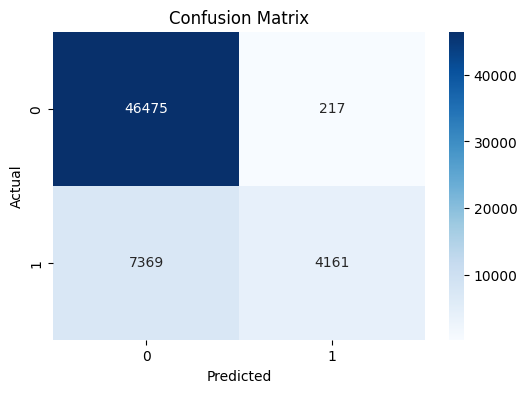

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generating Report

Classification Report :


[0] -- Not Deliquent -

 precision = 0.86

 recall = 1.00

 f1-score = 0.92


[1] -- Deliquent -

 precision = 0.95

 recall = 0.36

 f1-score = 0.52

Interpretation:

High Accuracy (86.97%): The model performs well overall, making correct predictions most of the time.

Precision (95.04%): Out of all the loans predicted to be delinquent, 95% were actually delinquent. This indicates that the model is good at minimizing false positives.

Recall (36.08%): Out of all the actual delinquent loans, the model correctly identified 36%. This shows the model is also fairly effective at catching most of the delinquent loans, though it does miss some (false negatives).